In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
r = np.random.RandomState(0)
mu0 = (1, 2)
cov0 = [[0.1, 0.1], [0.1, 0.3]]
x0 = r.multivariate_normal(mu0, cov0, 100)
mu1 = (1, 1)
cov1 = [[0.3, -0.1], [-0.1, 0.1]]
x1 = r.multivariate_normal(mu1, cov1, 100)

Text(0, 0.5, 'feature2')

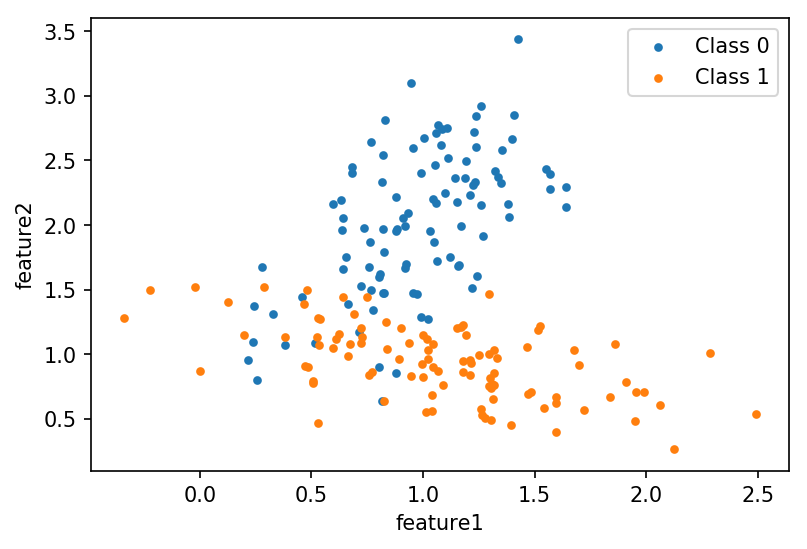

In [3]:
plt.figure(dpi=150)
plt.scatter(x0[:,0],x0[:,1],s=10,label='Class 0')
plt.scatter(x1[:,0],x1[:,1],s=10,label='Class 1')
plt.legend()
plt.xlabel('feature1')
plt.ylabel('feature2')

In [4]:
'''
mode1: the features may be dependent, and the covariance matrices are unique
mode2: features are independent but the covariance matrices under each class are unique
mode3: the covariance matrices under both classes are the same but the features may be dependent
mode4: covariance matrices under both classes are the same and the features are independent
'''
def trainBayesClassifier(data0, data1, mode):
    if mode=='ONE':
        mu0_hat = np.mean(data0,axis=0)
        mu1_hat = np.mean(data1,axis=0)
        cov0_hat = np.cov(data0.T)
        cov1_hat = np.cov(data1.T)
    if mode=='TWO':
        mu0_hat = np.mean(data0,axis=0)
        mu1_hat = np.mean(data1,axis=0)
        cov0_hat = np.array([[np.var(data0[:,0]),0],[0,np.var(data0[:,1])]])
        cov1_hat = np.array([[np.var(data1[:,0]),0],[0,np.var(data1[:,1])]])
    if mode=='THREE':
        mu0_hat = np.mean(data0,axis=0)
        mu1_hat = np.mean(data1,axis=0)
        data = np.concatenate(((data0 - mu0_hat),(data1 - mu1_hat)),axis=0)
        cov0_hat = np.cov(data.T)
        cov1_hat = np.cov(data.T)
    if mode=='FOUR':
        mu0_hat = np.mean(data0,axis=0)
        mu1_hat = np.mean(data1,axis=0)
        data = np.concatenate(((data0 - mu0_hat),(data1 - mu1_hat)),axis=0)
        cov0_hat = np.array([[np.var(data[:,0]),0],[0,np.var(data[:,1])]])
        cov1_hat = np.array([[np.var(data[:,0]),0],[0,np.var(data[:,1])]])
    W_0 = -1 / 2 * np.linalg.inv(cov0_hat)
    W_1 = -1 / 2 * np.linalg.inv(cov1_hat)
    w_0 = np.dot(np.linalg.inv(cov0_hat),mu0_hat)
    w_1 = np.dot(np.linalg.inv(cov1_hat),mu1_hat)
    w_00 = -1 / 2 * np.dot(np.dot(mu0_hat,np.linalg.inv(cov0_hat)),mu0_hat) - 1 / 2 * np.log(np.linalg.det(cov0_hat))
    w_10 = -1 / 2 * np.dot(np.dot(mu1_hat,np.linalg.inv(cov1_hat)),mu1_hat) - 1 / 2 * np.log(np.linalg.det(cov1_hat))
    return W_0, W_1, w_0, w_1, w_00, w_10

In [5]:
def runBayesClassifier(W_0, W_1, w_0, w_1, w_00, w_10, x_test):
    g0 = np.dot(np.dot(x_test,W_0),x_test) + np.dot(w_0,x_test) + w_00
    g1 = np.dot(np.dot(x_test,W_1),x_test) + np.dot(w_1,x_test) + w_10
    g = g1 - g0
    return g

def predictBayesClassifier(W_0, W_1, w_0, w_1, w_00, w_10, x_test):
    g0 = np.dot(np.dot(x_test,W_0),x_test) + np.dot(w_0,x_test) + w_00
    g1 = np.dot(np.dot(x_test,W_1),x_test) + np.dot(w_1,x_test) + w_10
    g = g1 - g0
    if g>= 0:
        predict = 1
    else:
        predict = 0
    return predict

In [6]:
def plotStatisticSurface(data0, data1, mode):
    data = np.concatenate((data0,data1),axis=0)
    f1_min, f1_max = data[:,0].min() - 0.2, data[:,0].max() + 0.2
    f2_min, f2_max = data[:,1].min() - 1, data[:,1].max() + 0.2
    ff1, ff2 = np.meshgrid(np.arange(f1_min, f1_max, 0.01), np.arange(f2_min, f2_max, 0.01))
    X_test = np.c_[ff1.ravel(), ff2.ravel()]
    W_0, W_1, w_0, w_1, w_00, w_10 = trainBayesClassifier(data0, data1, mode)
    Z = np.array([runBayesClassifier(W_0, W_1, w_0, w_1, w_00, w_10, x_test) for x_test in X_test])
    Z = Z.reshape(ff1.shape)
    Z_contour = np.array([predictBayesClassifier(W_0, W_1, w_0, w_1, w_00, w_10, x_test) for x_test in X_test])
    Z_contour = Z_contour.reshape(ff1.shape)
    plt.figure(dpi=200)
    colors = ['peachpuff','khaki','yellowgreen','deepskyblue','slateblue','rebeccapurple']
    cm = LinearSegmentedColormap.from_list('my', colors, N=1000)
    plt.contour(ff1, ff2, Z_contour, colors='gold', linewidths=1)
    plt.pcolormesh(ff1, ff2, Z, cmap=cm)
    plt.colorbar()
    plt.scatter(data0[:,0],data0[:,1],c='b',s=5,label='$H_0$')
    plt.scatter(data1[:,0],data1[:,1],c='orangered',s=5,label='$H_1$')
    plt.legend()
    plt.xlim(f1_min, f1_max)
    plt.ylim(f2_min, f2_max)
    plt.title("Bayes Classifier Decision Statistic Surface")
    plt.show()

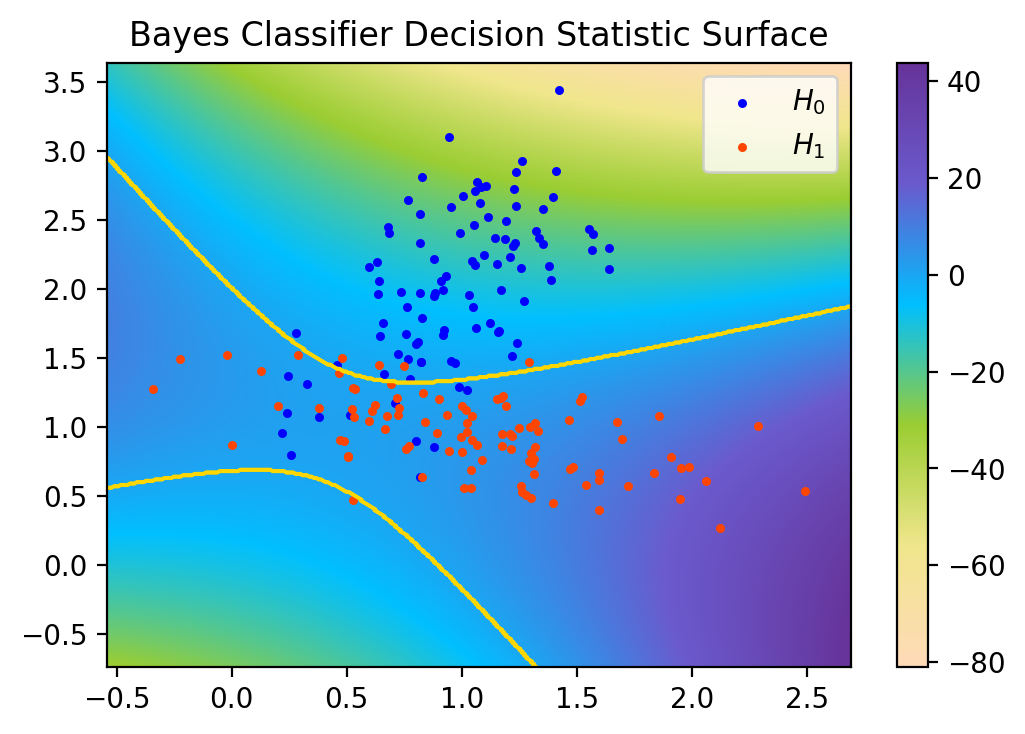

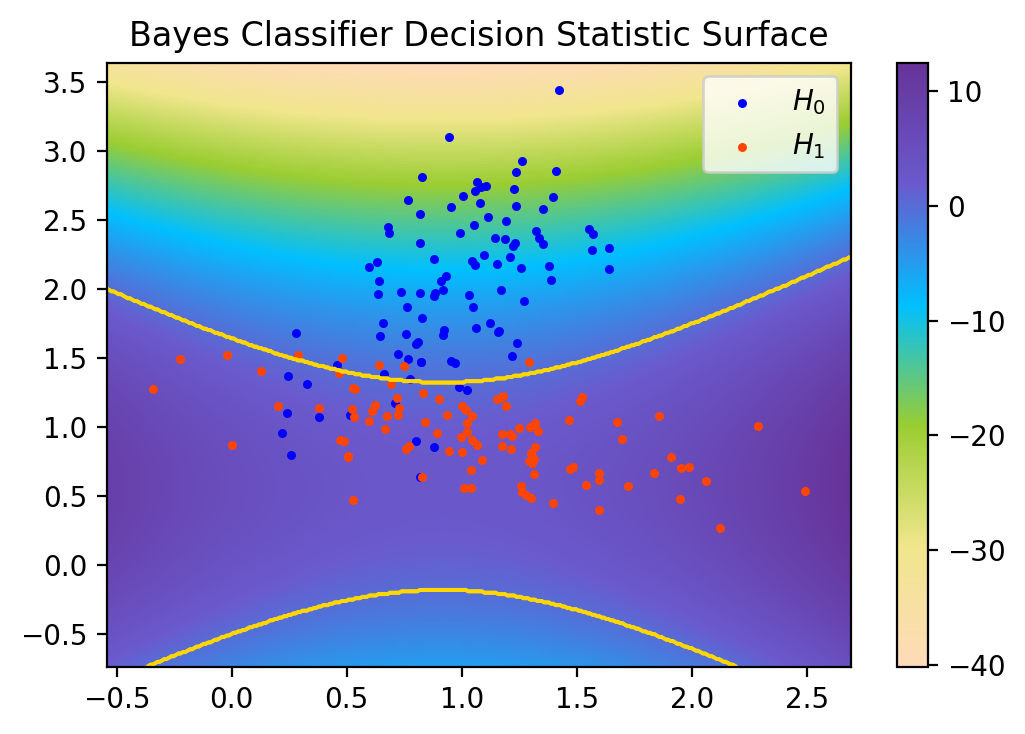

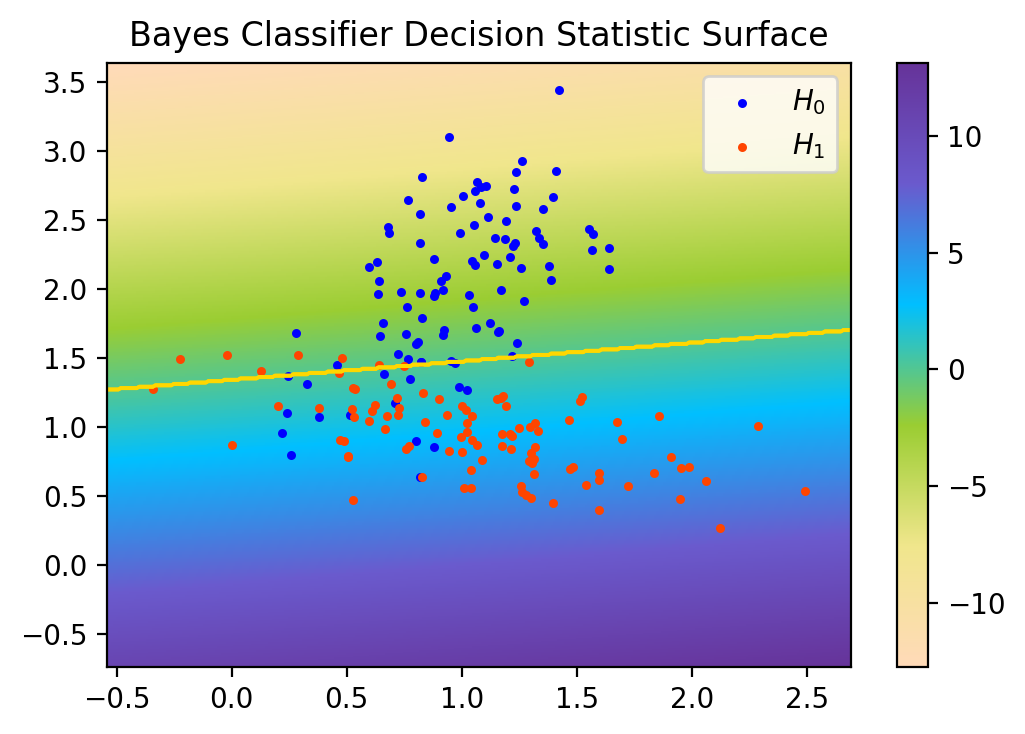

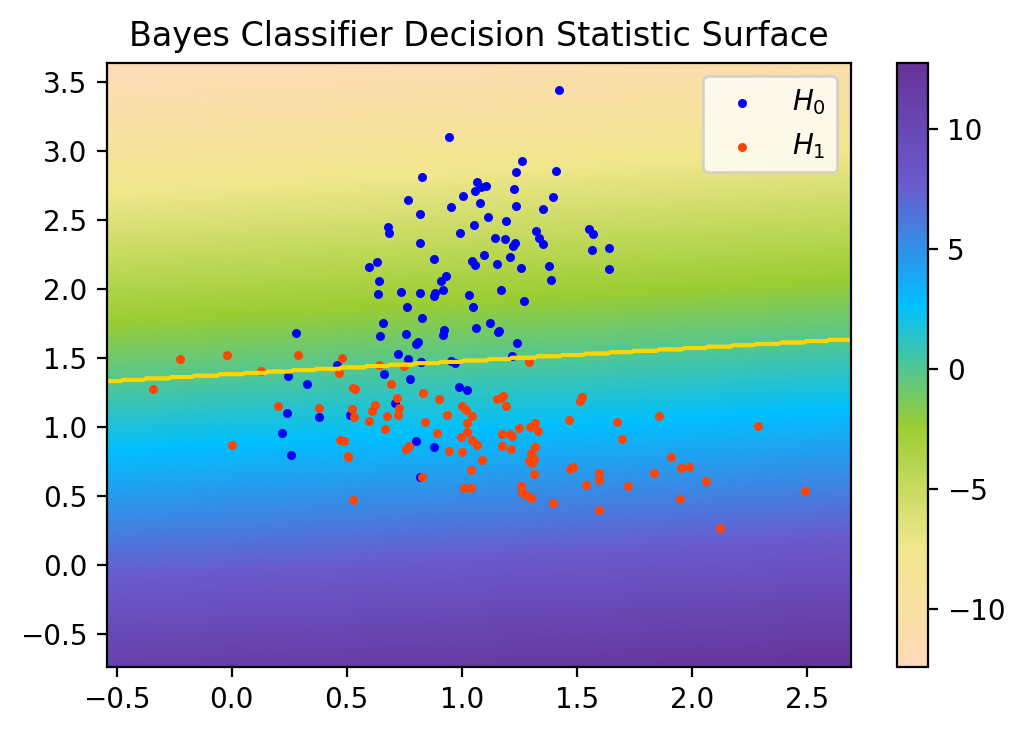

In [7]:
plotStatisticSurface(x0, x1, 'ONE')
plotStatisticSurface(x0, x1, 'TWO')
plotStatisticSurface(x0, x1, 'THREE')
plotStatisticSurface(x0, x1, 'FOUR')